In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df = pd.read_csv("data/table-17-(2014-15).csv", skiprows=13)

In [15]:
# Print the categories that show up in the Contract salary column
df['Contract salary'].unique()

array(['Contract salary < £18,031',
       'Contract salary ≥ £18,031 and < £24,057',
       'Contract salary ≥ £24,057 and < £32,277',
       'Contract salary ≥ £32,277 and < £43,325',
       'Contract salary ≥ £43,325 and < £58,172',
       'Contract salary ≥ £58,172', 'Total'], dtype=object)

In [20]:
# Remove any rows that have an "all" in any field if the column is a string
df = df[~df.apply(lambda x: x.astype(str).str.contains('All').any(), axis=1)]

In [239]:
df = pd.read_csv("../data/cleaned/oxford_all_years.txt", sep="\t")

In [240]:
# Remove any rows that have an "all" in any field if the column is a string
df_cleaned = df[~df.apply(lambda x: x.astype(str).str.contains('All').any(), axis=1)]

In [241]:
df.head()

,UKPRN,HE_Provider,Academic_employment_function,Contract_levels,Sex,Academic_Year,Contract_salary,Number,Salary_Band
0,10007774,The University of Oxford,Both teaching and research,Other contract level,Female,2014/15,"Contract salary < £18,031",0,Band_1
1,10007774,The University of Oxford,Both teaching and research,Other contract level,Female,2014/15,"Contract salary ≥ £18,031 and < £24,057",0,Band_2
2,10007774,The University of Oxford,Both teaching and research,Other contract level,Female,2014/15,"Contract salary ≥ £24,057 and < £32,277",5,Band_3
3,10007774,The University of Oxford,Both teaching and research,Other contract level,Female,2014/15,"Contract salary ≥ £32,277 and < £43,325",50,Band_4
4,10007774,The University of Oxford,Both teaching and research,Other contract level,Female,2014/15,"Contract salary ≥ £43,325 and < £58,172",90,Band_5


In [242]:
proportions = pd.DataFrame(columns=['Year', 'Proportion'], index=[])
# proportions.set_index('Year', inplace=True)

def plot_thing(ax, df_cleaned, thing='Salary_Band'):
    proportions = pd.DataFrame(columns=['Year', 'Proportion'], index=[])
    proportions.set_index('Year', inplace=True)
    for band in df_cleaned[thing].unique():
        for academic_year in df_cleaned['Academic_Year'].unique():
            counts = [(df_cleaned[
                (df_cleaned[thing]==band) &\
                (df_cleaned['Academic_Year']==academic_year) &\
                (df_cleaned['Sex']==sex)]['Number'].sum()) for sex in ['Female', 'Male']]
            
            if counts[1] == 0:
                continue
            else:
                val = counts[0]/(counts[0] + counts[1])
            
            proportions = pd.concat([proportions, pd.DataFrame({'Proportion': val, 'Year':academic_year, thing:band}, index=[0])], ignore_index=True)

    sns.lineplot(ax=ax, data=proportions, x='Year', y='Proportion', hue=thing)
    # ax.set_ylim(0, 1)
    ax.hlines(0.5, 0, 8, linestyles='dashed', colors='black')
    plt.tight_layout()

C:\Users\Gabi\AppData\Local\Temp\ipykernel_19952\351161267.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  proportions = pd.concat([proportions, pd.DataFrame({'Proportion': val, 'Year':academic_year, thing:band}, index=[0])], ignore_index=True)
C:\Users\Gabi\AppData\Local\Temp\ipykernel_19952\351161267.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  proportions = pd.concat([proportions, pd.DataFrame({'Proportion': val, 'Year':academic_year, thing:band}, index=[0])], ignore_index=True)


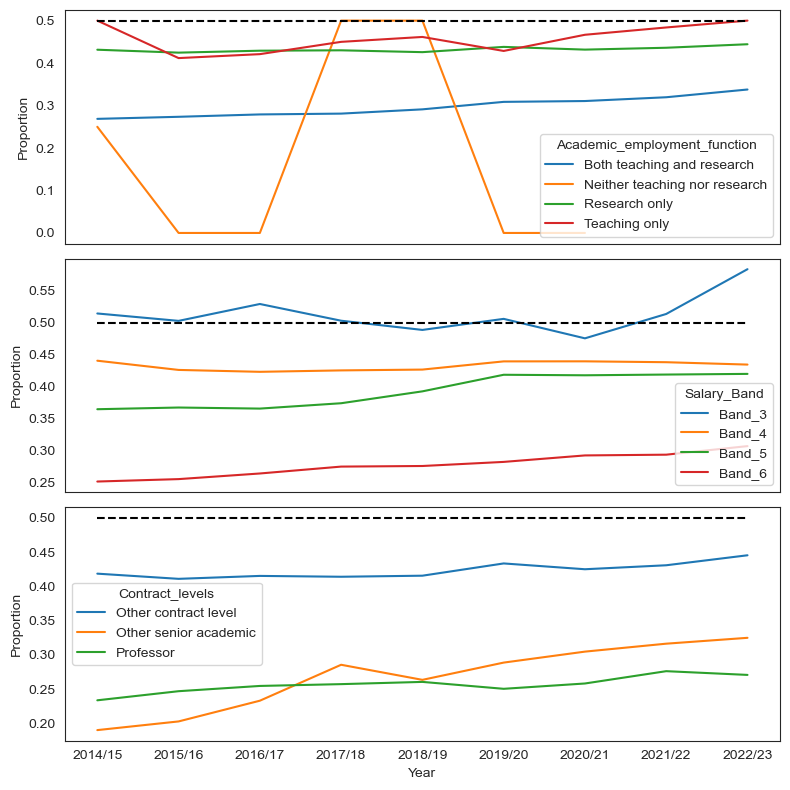

In [244]:
fig, axs = plt.subplots(3, 1, figsize=(8, 8), sharex=True)

plot_thing(axs[0], df_cleaned, 'Academic_employment_function')
plot_thing(axs[1], df_cleaned, 'Salary_Band')
plot_thing(axs[2], df_cleaned, 'Contract_levels')

plt.savefig('../plots/oxford_proportions.png', dpi=300)

In [49]:
df_all = pd.read_csv("../data/cleaned/russell_group_all_years.txt", sep="\t")
df_all = df_all[~df_all.apply(lambda x: x.astype(str).str.contains('All').any(), axis=1)]
df_all.head()

,UKPRN,HE_Provider,Academic_employment_function,Contract_levels,Sex,Academic_Year,Contract_salary,Number,Salary_Band
0,10005343,Queen's University Belfast,Both teaching and research,Other contract level,Female,2014/15,"Contract salary < £18,031",0,Band_1
1,10005343,Queen's University Belfast,Both teaching and research,Other contract level,Female,2014/15,"Contract salary ≥ £18,031 and < £24,057",0,Band_2
2,10005343,Queen's University Belfast,Both teaching and research,Other contract level,Female,2014/15,"Contract salary ≥ £24,057 and < £32,277",0,Band_3
3,10005343,Queen's University Belfast,Both teaching and research,Other contract level,Female,2014/15,"Contract salary ≥ £32,277 and < £43,325",105,Band_4
4,10005343,Queen's University Belfast,Both teaching and research,Other contract level,Female,2014/15,"Contract salary ≥ £43,325 and < £58,172",105,Band_5


In [178]:
oxf_ly = df_cleaned[df_cleaned['Academic_Year']=='2022/23'].groupby(["Salary_Band", "Sex"])["Number"].sum()
ox_props = oxf_ly[:, "Female"] / (oxf_ly[:, "Female"] + oxf_ly[:, "Male"])

In [195]:
props_all = pd.DataFrame(columns=['Salary_Band', 'Proportion'], index=[])

for provider in df_all['HE_Provider'].unique():
    dfs = df_all[(df_all['Academic_Year']=='2022/23') & (df_all['HE_Provider'] == provider)].groupby(["Salary_Band", "Sex"])["Number"].sum()
    props = (dfs[:, 'Female'] / (dfs[:, 'Male'] + dfs[:, 'Female']))
    props_all = pd.concat([props_all, pd.DataFrame({'Salary_Band': props.index, 'Proportion': props.values})], ignore_index=True)

C:\Users\Gabi\AppData\Local\Temp\ipykernel_19952\2471431234.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  props_all = pd.concat([props_all, pd.DataFrame({'Salary_Band': props.index, 'Proportion': props.values})], ignore_index=True)


In [223]:
props_all['Institution'] = 'Russel Group'

C:\Users\Gabi\AppData\Local\Temp\ipykernel_19952\3341334230.py:5: UserWarning: The palette list has more values (12) than needed (1), which may not be intended.
  sns.boxplot(props_all, x='Salary_Band', y='Proportion', showfliers=False, color='white', linewidth=1, palette=pal, hue='Institution')


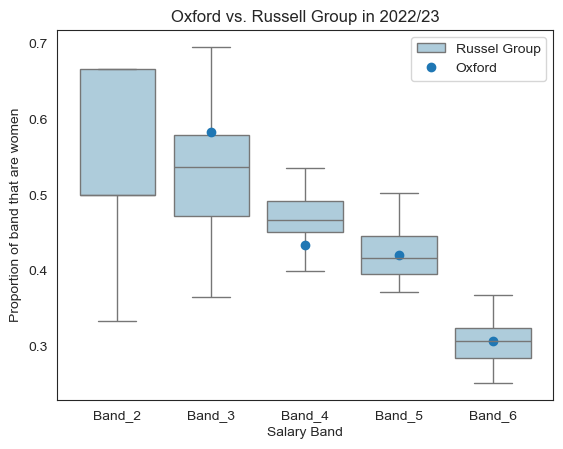

In [233]:
sns.set_style('white')
pal = sns.color_palette('Paired')
plt.figure()
# plt.plot(props, label='Avg. Russell Group')
sns.boxplot(props_all, x='Salary_Band', y='Proportion', showfliers=False, color='white', linewidth=1, palette=pal, hue='Institution')
plt.plot(ox_props, 'o', label='Oxford')
plt.xlabel("Salary Band")
plt.ylabel("Proportion of band that are women")
plt.title("Oxford vs. Russell Group in 2022/23")
plt.legend()
plt.savefig('../plots/oxford_vs_russell_group.png', dpi=300)

C:\Users\Gabi\AppData\Local\Temp\ipykernel_19952\351161267.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  proportions = pd.concat([proportions, pd.DataFrame({'Proportion': val, 'Year':academic_year, thing:band}, index=[0])], ignore_index=True)
C:\Users\Gabi\AppData\Local\Temp\ipykernel_19952\351161267.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  proportions = pd.concat([proportions, pd.DataFrame({'Proportion': val, 'Year':academic_year, thing:band}, index=[0])], ignore_index=True)


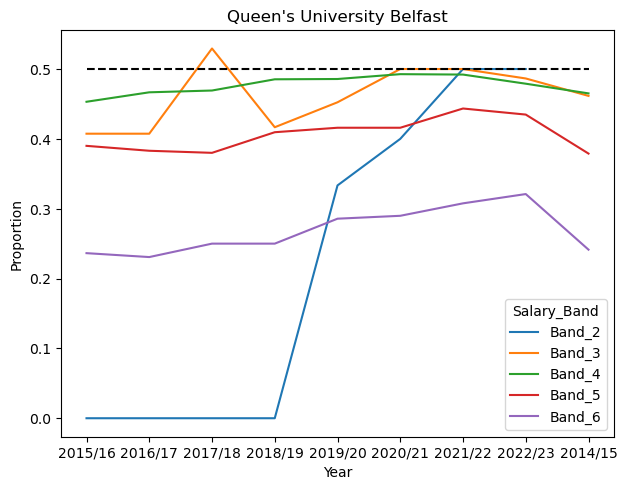

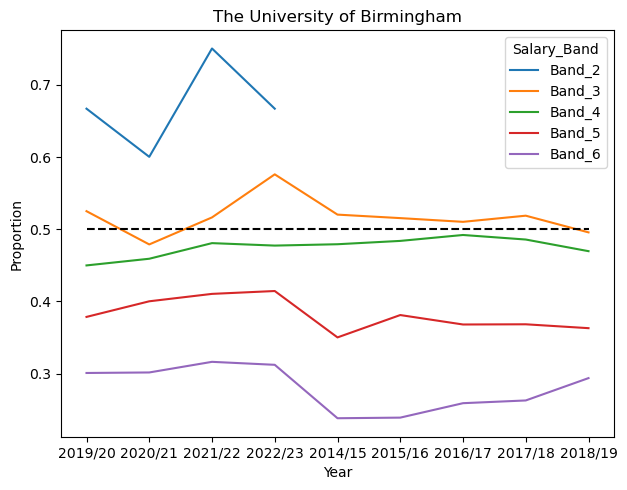

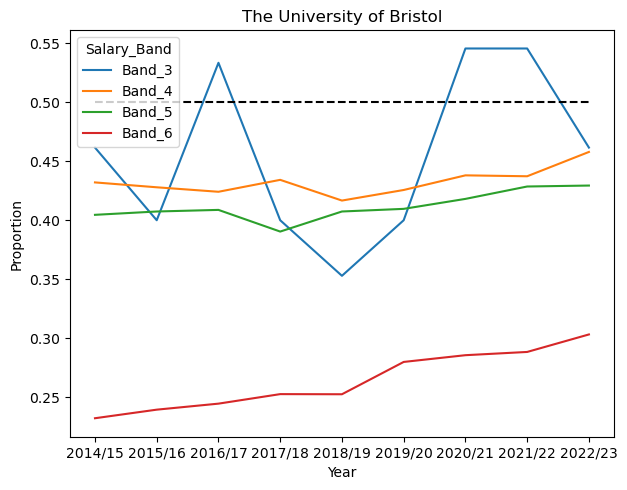

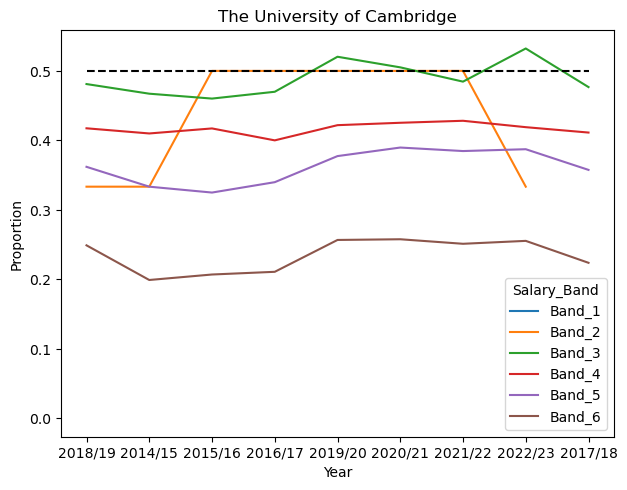

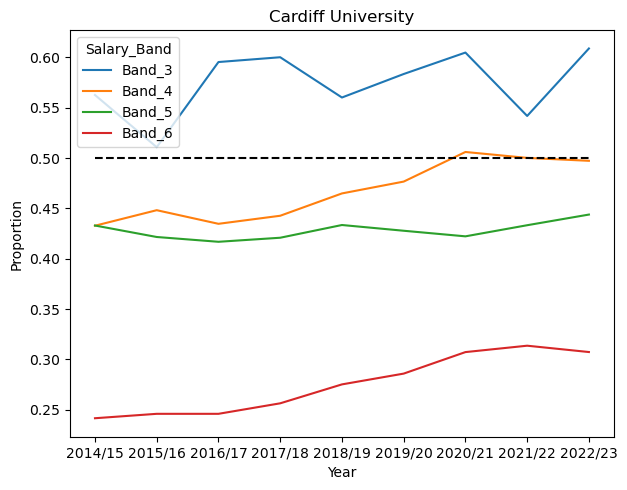

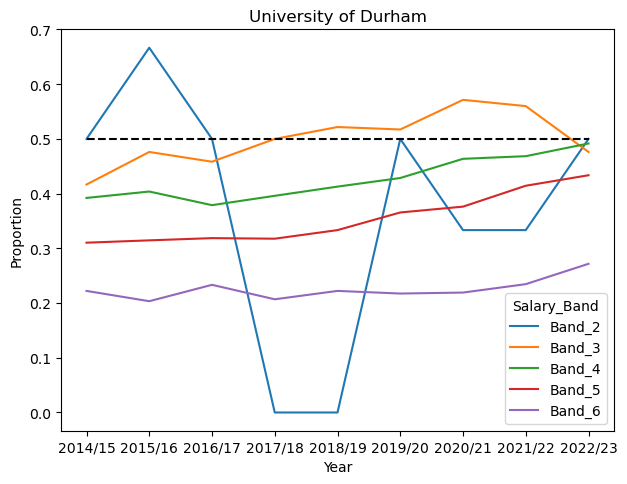

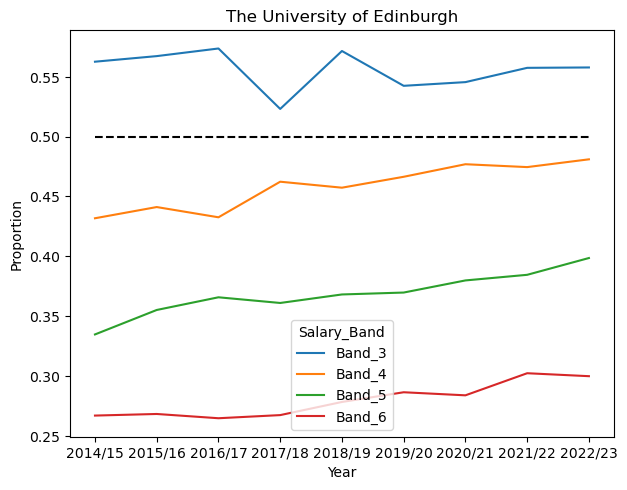

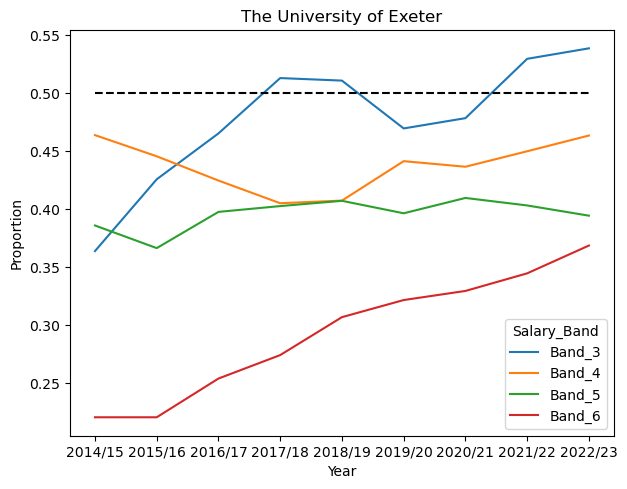

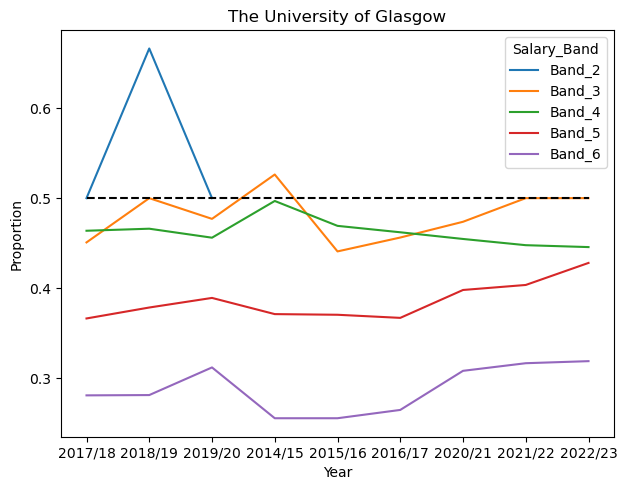

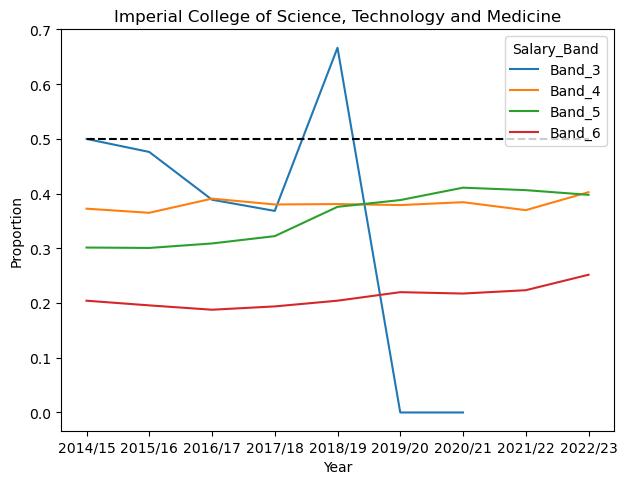

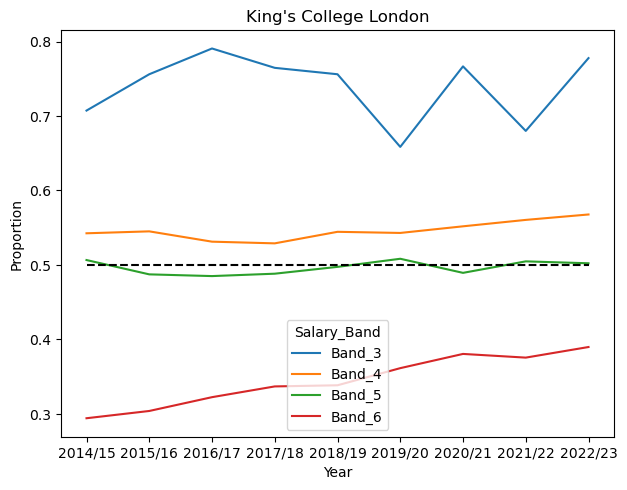

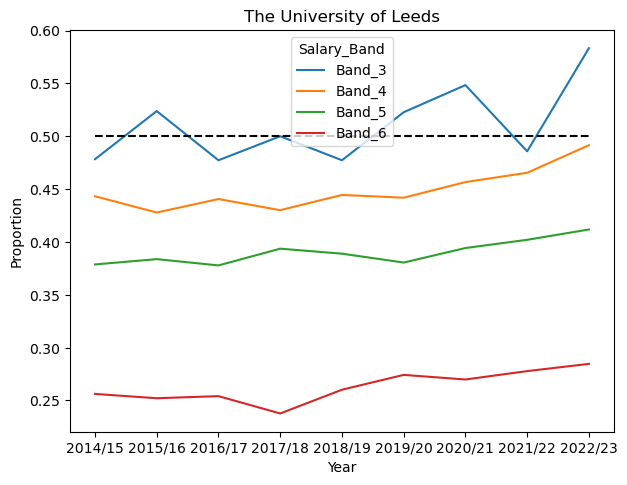

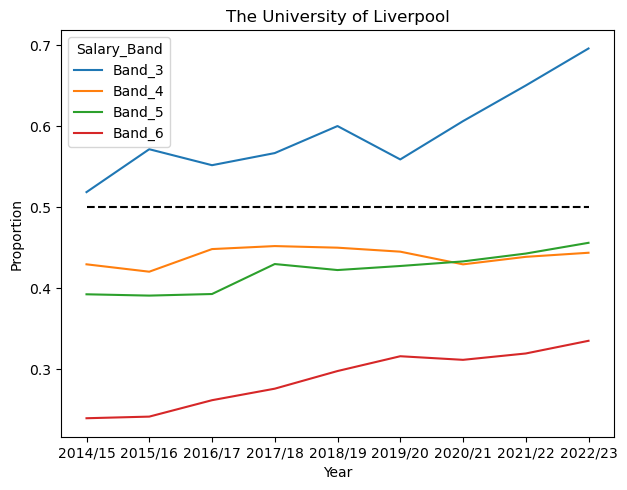

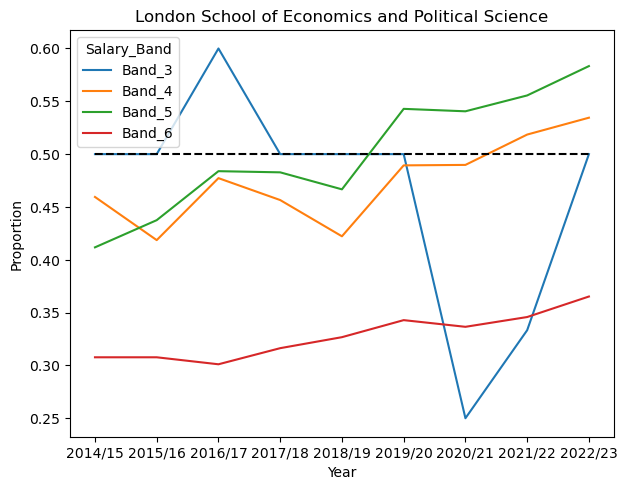

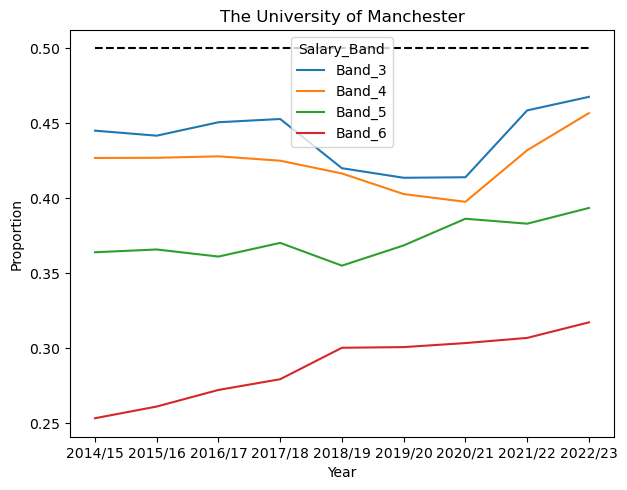

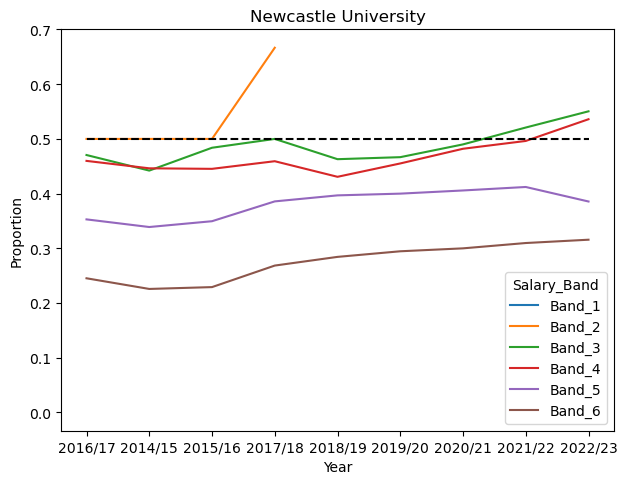

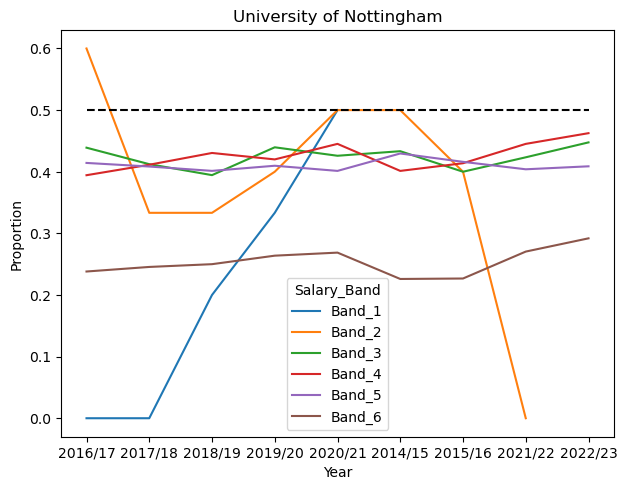

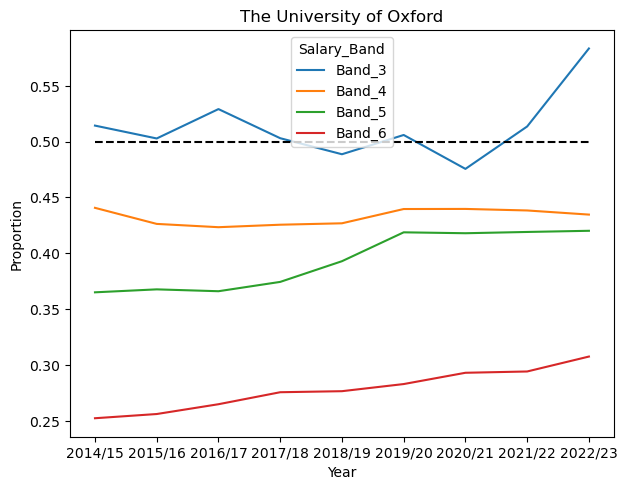

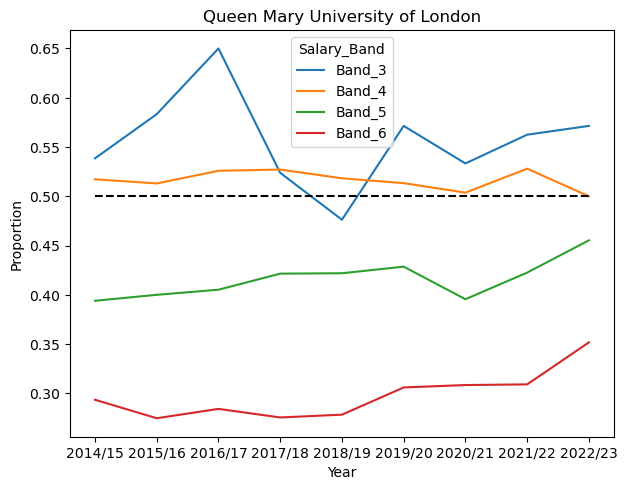

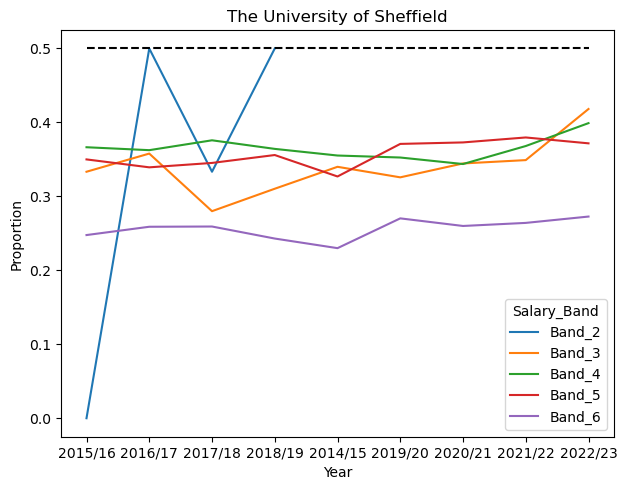

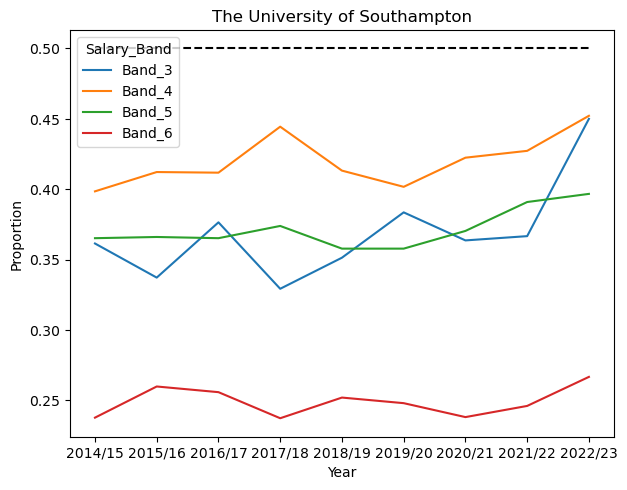

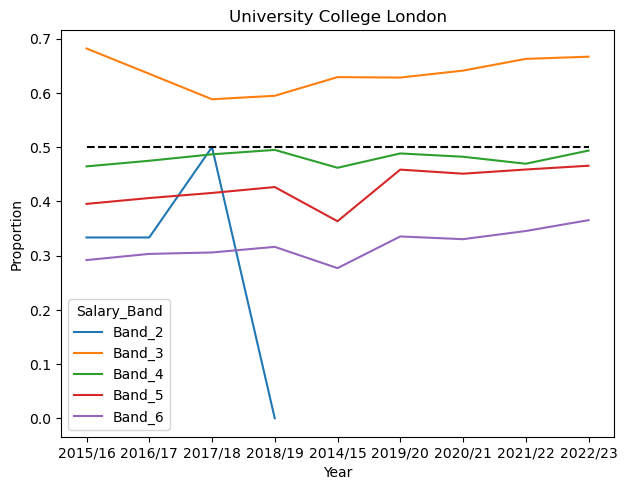

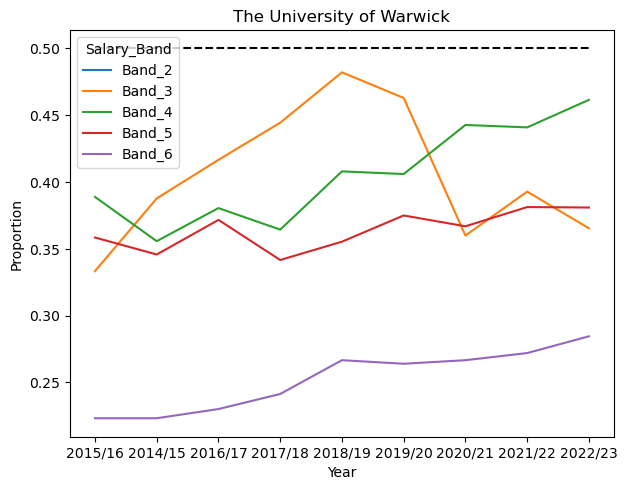

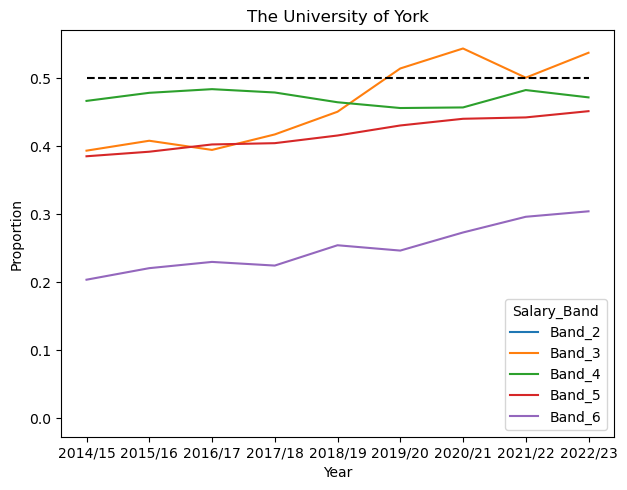

In [96]:
for provider in df_all["HE_Provider"].unique():
    fig, ax = plt.subplots()
    plot_thing(ax, df_all[df_all["HE_Provider"] == provider], 'Salary_Band')
    plt.title(provider)